**HARSH AGRAWAL**

**22BCE2391**

**LAB ASSIGNMENT-4**

I. Implement the hierarchical clustering for Iris Flower dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

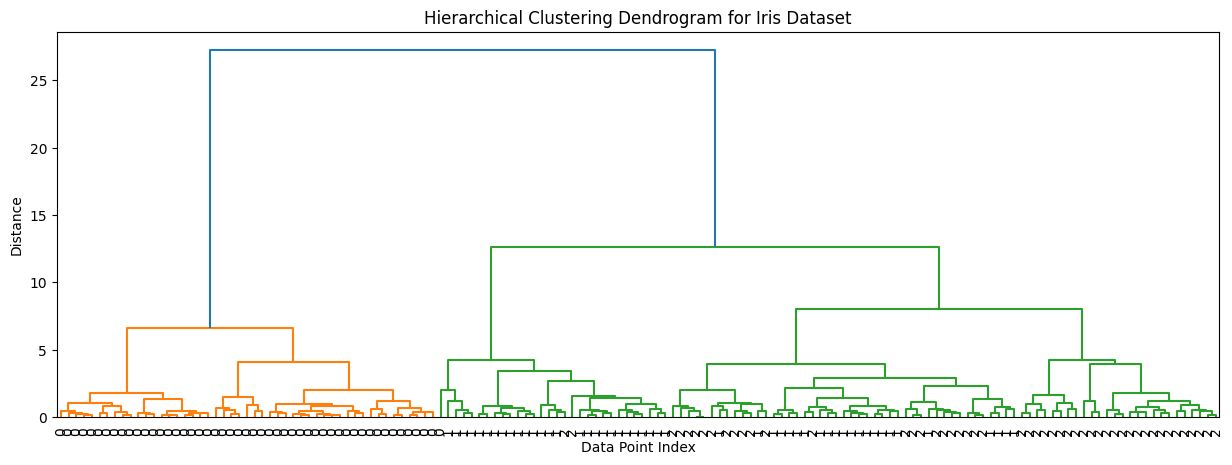

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 5))
dendrogram(linked, labels=y, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram for Iris Dataset")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()

II.  Let us consider data set mushroom have 22 baseline variables like cap-shape, 
capcolor, odor and so on were obtained for each of n = 8124 mushrooms, as well 
as the response of interest, a qualitative measure of category after baseline. 
Implement Principal Component Analysis for the given dataset. 
Perform the following tasks: 

Tasks: 

1. Data Loading and Exploration: 
    Load the provided dataset. 
    Explore the dataset to understand its characteristics, including the number of features and data points. 
2. Data Preprocessing: 
    Standardize or normalize the data if necessary. 
3. Covariance Matrix: 
    Calculate the covariance matrix of the dataset. 
4. Eigenvalue and Eigenvector Computation: 
    Compute the eigenvalues and eigenvectors of the covariance matrix. 
5. Explained Variance: 
    Calculate the explained variance for each principal component. 
    Determine the cumulative explained variance to decide on the number of principal components to retain. 
6. Dimensionality Reduction: 
    Select the top 'k' principal components based on the cumulative explained variance. 
    Transform the data into the reduced-dimensional space. 
7. Visualization: 
    Visualize the data in the reduced-dimensional space. 
8.  Interpretation: 
    Discuss the results and interpret the impact of dimensionality reduction on the dataset.

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification

In [4]:
X, _ = make_classification(n_samples=8124, n_features=22, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cov_matrix = np.cov(X_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance = eigenvalues / sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)
k = np.argmax(cumulative_variance >= 0.95) + 1
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

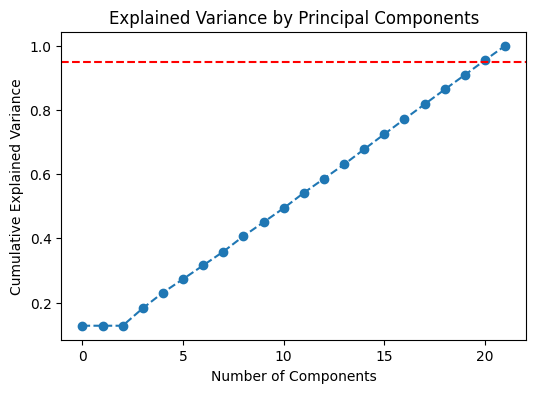

Selected 21 principal components.


In [5]:
plt.figure(figsize=(6,4))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

print(f"Selected {k} principal components.")

III. Implement Random Forest Algorithm using the Bill authentication Dataset and evaluate its performance using appropriate metrics. 

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

In [7]:
X, y = make_classification(n_samples=1000, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.945
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       101
           1       0.95      0.94      0.94        99

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



IV. Implement Ada boost algorithm to classify flower species. 

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



V. Comparison of various Classification Machine Learning algorithms and evaluate its performance using the appropriate metrics. 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred)}")


Logistic Regression Accuracy: 1.0

KNN Accuracy: 1.0

SVM Accuracy: 1.0


: 